In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', message='use_inf_as_na option is deprecated')
# warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("/kaggle/input/playground-series-s4e12/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s4e12/test.csv")
sample_submission = pd.read_csv("/kaggle/input/playground-series-s4e12/sample_submission.csv")

df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [3]:
test.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    800000 non-null  int64  
 1   Age                   787511 non-null  float64
 2   Gender                800000 non-null  object 
 3   Annual Income         770140 non-null  float64
 4   Marital Status        787664 non-null  object 
 5   Number of Dependents  726870 non-null  float64
 6   Education Level       800000 non-null  object 
 7   Occupation            560875 non-null  object 
 8   Health Score          750551 non-null  float64
 9   Location              800000 non-null  object 
 10  Policy Type           800000 non-null  object 
 11  Previous Claims       557198 non-null  float64
 12  Vehicle Age           799997 non-null  float64
 13  Credit Score          708549 non-null  float64
 14  Insurance Duration    799998 non-null  float64
 15  

In [6]:
#df = df.drop(['id','Previous Claims'], axis=1)
#test = test.drop(['id','Previous Claims'], axis=1)

In [7]:
df.isnull().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [8]:
test.isnull().sum()

id                           0
Age                      12489
Gender                       0
Annual Income            29860
Marital Status           12336
Number of Dependents     73130
Education Level              0
Occupation              239125
Health Score             49449
Location                     0
Policy Type                  0
Previous Claims         242802
Vehicle Age                  3
Credit Score             91451
Insurance Duration           2
Policy Start Date            0
Customer Feedback        52276
Smoking Status               0
Exercise Frequency           0
Property Type                0
dtype: int64

In [9]:
print(df.columns)

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')


In [10]:
print(test.columns)

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type'],
      dtype='object')


In [11]:
# Replace 'Policy Start Date' with your actual column name
df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'], errors='coerce')  # Convert to datetime object

# Optionally format the dates to a standard string format (e.g., YYYY-MM-DD)
df['Policy Start Date'] = df['Policy Start Date'].dt.strftime('%Y-%m-%d')

# Check for any invalid dates that were converted to NaT (Not a Time)
invalid_dates = df['Policy Start Date'].isnull().sum()
print(f"Number of invalid dates: {invalid_dates}")

# Display a sample of the DataFrame to confirm the changes
#print(df.head())

Number of invalid dates: 0


In [12]:
# Replace 'Policy Start Date' with your actual column name
test['Policy Start Date'] = pd.to_datetime(test['Policy Start Date'], errors='coerce')  # Convert to datetime object

# Optionally format the dates to a standard string format (e.g., YYYY-MM-DD)
test['Policy Start Date'] = test['Policy Start Date'].dt.strftime('%Y-%m-%d')

# Check for any invalid dates that were converted to NaT (Not a Time)
invalid_dates = test['Policy Start Date'].isnull().sum()
print(f"Number of invalid dates: {invalid_dates}")

# Display a sample of the DataFrame to confirm the changes
#print(df.head())

Number of invalid dates: 0


handling numerical missing values

In [13]:
 df['Age'] = df['Age'].fillna(df['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

In [14]:
df['Annual Income'] = df['Annual Income'].fillna(df['Annual Income'].median())
test['Annual Income'] = test['Annual Income'].fillna(test['Annual Income'].median())

In [15]:
df['Number of Dependents'] = df['Number of Dependents'].fillna(df['Number of Dependents'].mode()[0])
test['Number of Dependents'] = test['Number of Dependents'].fillna(test['Number of Dependents'].mode()[0])

In [16]:
df['Previous Claims'] = df['Previous Claims'].fillna(df['Previous Claims'].mode()[0])
test['Previous Claims'] = test['Previous Claims'].fillna(test['Previous Claims'].mode()[0])

In [17]:
df['Health Score'] = df['Health Score'].fillna(df['Health Score'].median())
test['Health Score'] = test['Health Score'].fillna(test['Health Score'].median())

In [18]:
df['Credit Score'] = df['Credit Score'].fillna(df['Credit Score'].median())
test['Credit Score'] = test['Credit Score'].fillna(test['Credit Score'].median())

In [19]:
df['Vehicle Age'] = df['Vehicle Age'].fillna(df['Vehicle Age'].median())
test['Vehicle Age'] = test['Vehicle Age'].fillna(test['Vehicle Age'].median())

In [20]:
df['Insurance Duration'] = df['Insurance Duration'].fillna(df['Insurance Duration'].median())
test['Insurance Duration'] = test['Insurance Duration'].fillna(test['Insurance Duration'].median())

Now for categorical values

In [21]:
df['Marital Status'] = df['Marital Status'].fillna('Unknown')
test['Marital Status'] = test['Marital Status'].fillna('Unknown')

In [22]:
df['Occupation'] = df['Occupation'].fillna('unspecified')
test['Occupation'] = test['Occupation'].fillna('unspecified')

In [23]:
df['Customer Feedback'] = df['Customer Feedback'].fillna('No Feedback')
test['Customer Feedback'] = test['Customer Feedback'].fillna('No Feedback')

In [24]:
# Define the bins and labels for age groups
bins = [0, 18, 30, 40, 50, 60, 70]  # Define bin edges
labels = ['<18', '18-29', '30-39', '40-49', '50-59', '60+']  # Labels corresponding to the bins

# Apply binning to the Age column
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Convert Age column to integer
df['Age'] = df['Age'].astype(int)

In [25]:
# Define the bins and labels for age groups
bins = [0, 18, 30, 40, 50, 60, 70]  # Define bin edges
labels = ['<18', '18-29', '30-39', '40-49', '50-59', '60+']  # Labels corresponding to the bins

# Apply binning to the Age column
test['Age Group'] = pd.cut(test['Age'], bins=bins, labels=labels, right=False)

# Convert Age column to integer
test['Age'] = test['Age'].astype(int)

In [26]:
df.isnull().sum()

id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
Age Group               0
dtype: int64

In [27]:
test.isnull().sum()

id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Age Group               0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   id                    1200000 non-null  int64   
 1   Age                   1200000 non-null  int64   
 2   Gender                1200000 non-null  object  
 3   Annual Income         1200000 non-null  float64 
 4   Marital Status        1200000 non-null  object  
 5   Number of Dependents  1200000 non-null  float64 
 6   Education Level       1200000 non-null  object  
 7   Occupation            1200000 non-null  object  
 8   Health Score          1200000 non-null  float64 
 9   Location              1200000 non-null  object  
 10  Policy Type           1200000 non-null  object  
 11  Previous Claims       1200000 non-null  float64 
 12  Vehicle Age           1200000 non-null  float64 
 13  Credit Score          1200000 non-null  float64 
 14  Insurance Duration

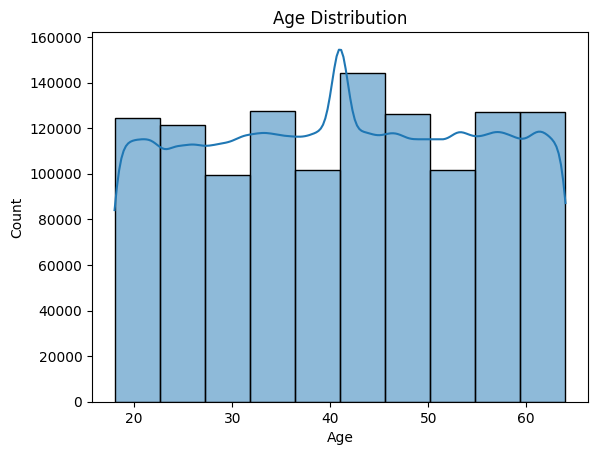

In [29]:
sns.histplot(df['Age'], bins=10, kde=True)
plt.title("Age Distribution")
plt.show()

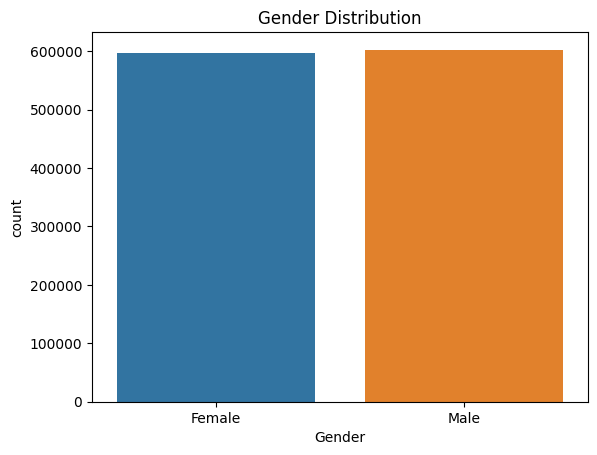

In [30]:
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()

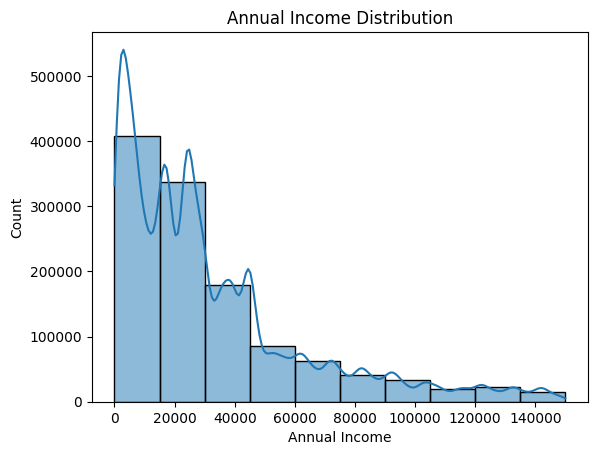

In [31]:
sns.histplot(df['Annual Income'], bins=10, kde=True)
plt.title("Annual Income Distribution")
plt.show()

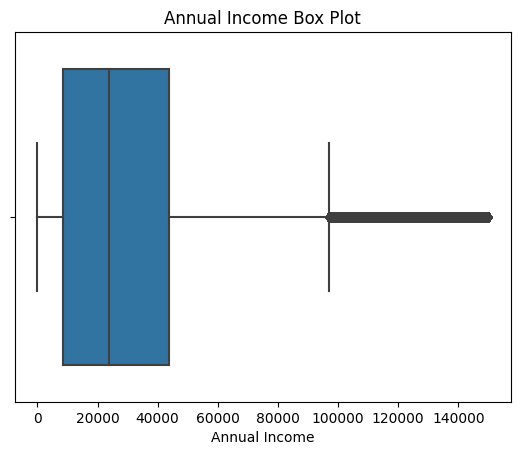

In [32]:
sns.boxplot(x=df['Annual Income'])
plt.title("Annual Income Box Plot")
plt.show()

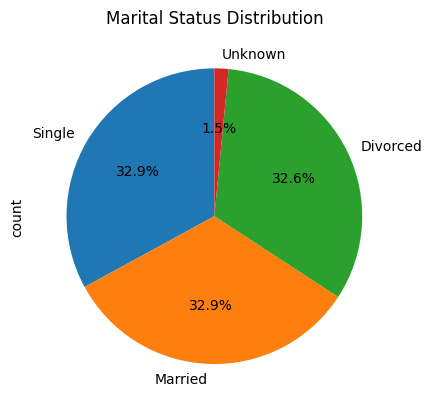

In [33]:
df['Marital Status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Marital Status Distribution")
#plt.ylabel("")  
plt.show()

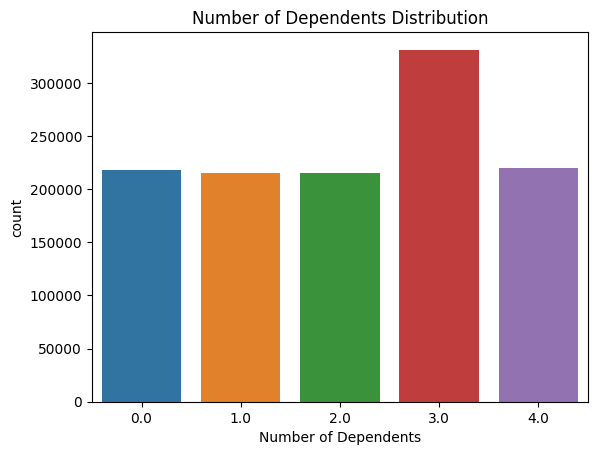

In [34]:
sns.countplot(x='Number of Dependents', data=df)
plt.title("Number of Dependents Distribution")
plt.show()

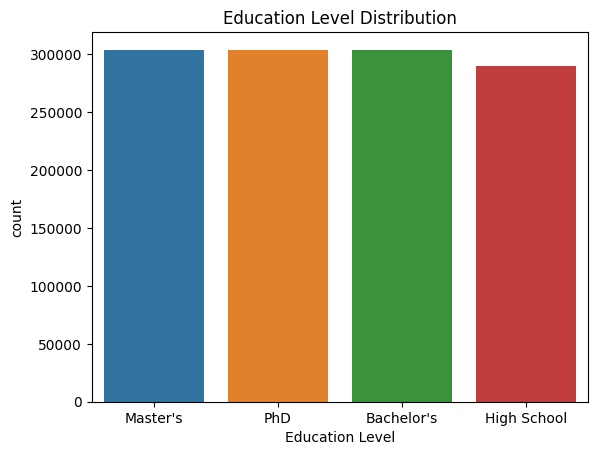

In [35]:
sns.countplot(x='Education Level', data=df, order=df['Education Level'].value_counts().index)
plt.title("Education Level Distribution")
plt.show()

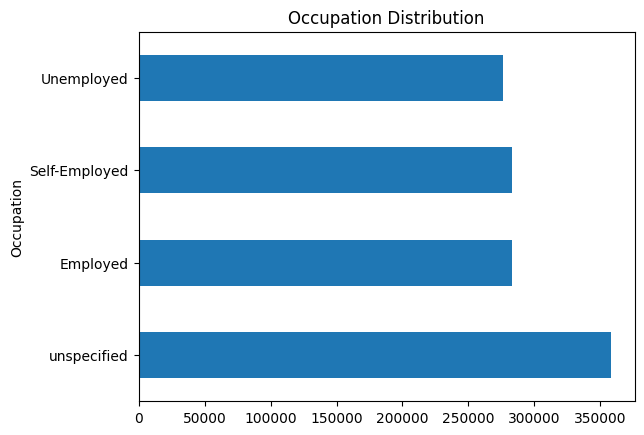

In [36]:
df['Occupation'].value_counts().plot(kind='barh')
plt.title("Occupation Distribution")
plt.show()

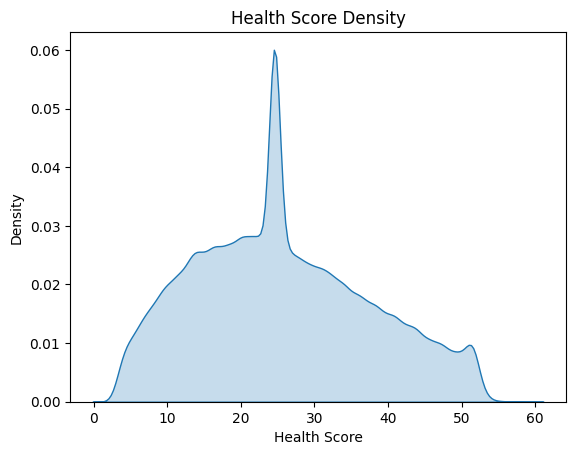

In [37]:
sns.kdeplot(df['Health Score'], fill=True)
plt.title("Health Score Density")
plt.show()

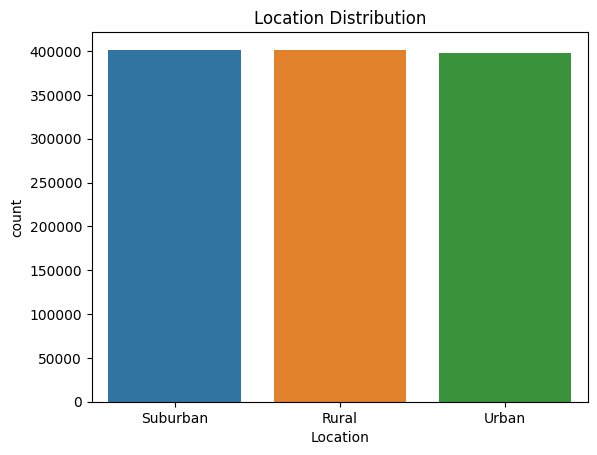

In [38]:
sns.countplot(x='Location', data=df, order=df['Location'].value_counts().index)
plt.title("Location Distribution")
plt.show()

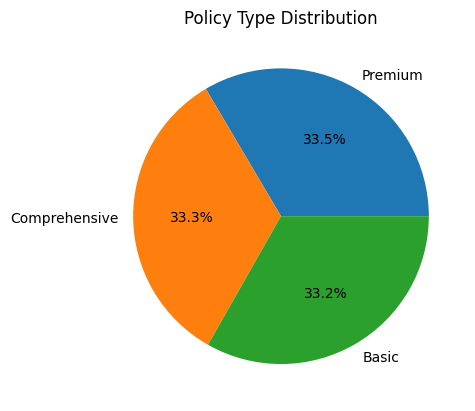

In [39]:
df['Policy Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Policy Type Distribution")
plt.ylabel("")  # Optional: to hide ylabel
plt.show()

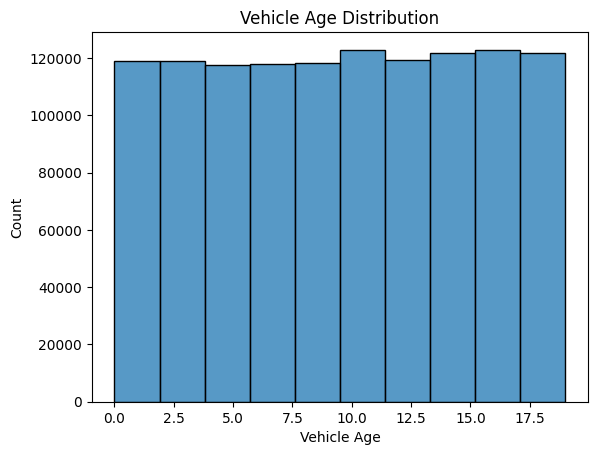

In [40]:
sns.histplot(df['Vehicle Age'], bins=10)
plt.title("Vehicle Age Distribution")
plt.show()

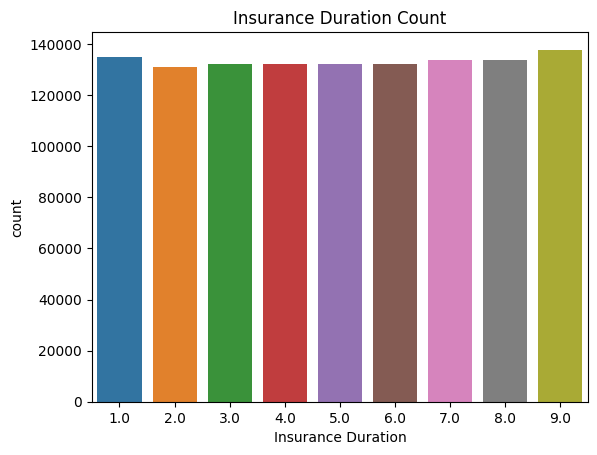

In [41]:
sns.countplot(x='Insurance Duration', data=df)
plt.title("Insurance Duration Count")
plt.show()

In [42]:

# Time Series Plot
# df['Policy Start Date'].dt.year.value_counts().sort_index().plot(kind='line')
# plt.title("Policy Start Dates Over Time")
# plt.show()

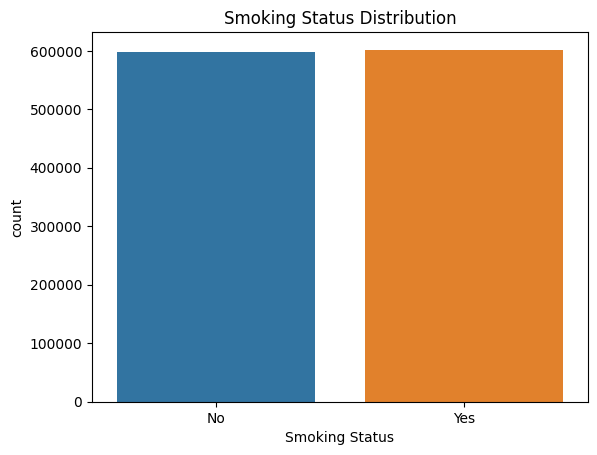

In [43]:
sns.countplot(x='Smoking Status', data=df)
plt.title("Smoking Status Distribution")
plt.show()

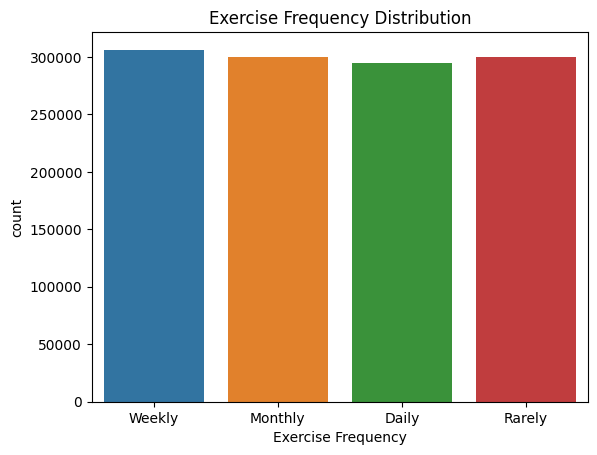

In [44]:
sns.countplot(x='Exercise Frequency', data=df)
plt.title("Exercise Frequency Distribution")
plt.show()

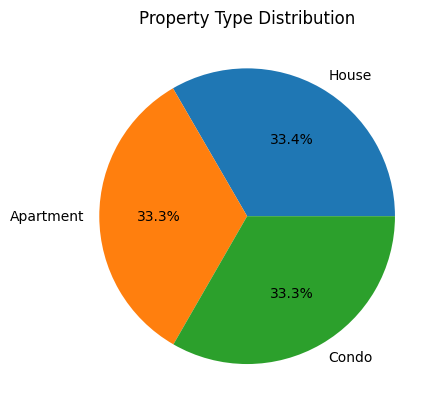

In [45]:
df['Property Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Property Type Distribution")
plt.ylabel("")  # Optional: to hide ylabel
plt.show()

Inter-Features Analysis!!!

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


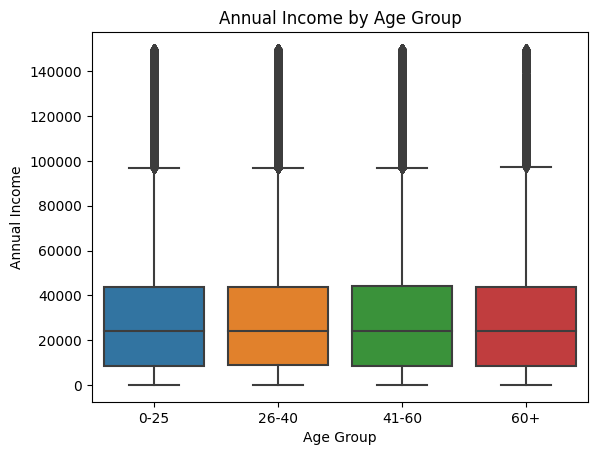

In [46]:
#Age vs. Annual Income(Understand how income varies across age groups)

df['Age Group'] = pd.cut(df['Age'], bins=[0, 25, 40, 60, 100], labels=['0-25', '26-40', '41-60', '60+'])
sns.boxplot(x='Age Group', y='Annual Income', data=df)
plt.title("Annual Income by Age Group")
plt.show()

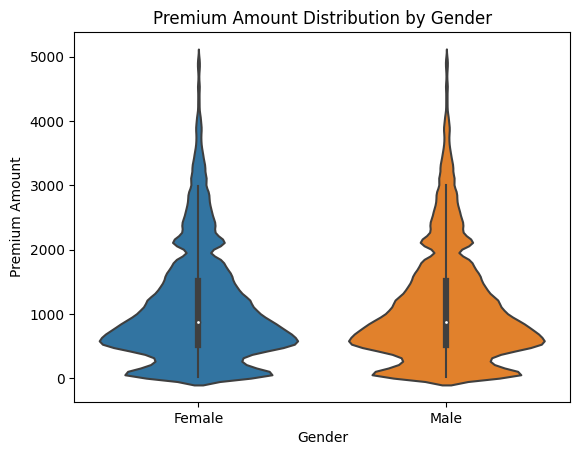

In [47]:
# Gender vs. Premium Amount(Analyze if there's a difference in premium amounts paid by different genders.)
sns.violinplot(x='Gender', y='Premium Amount', data=df)
plt.title("Premium Amount Distribution by Gender")
plt.show()

In [48]:
# Education Level vs. Occupation(Understand the relationship between education and job roles)
# edu_occ.plot(kind='bar', colormap='viridis', figsize=(12, 6))
# plt.title("Education Level vs. Occupation")
# plt.ylabel("Percentage")
# plt.show()

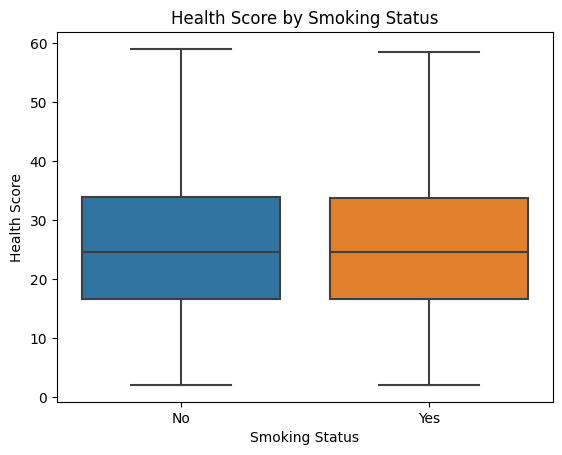

In [49]:
#Smoking Status vs. Health Score
sns.boxplot(x='Smoking Status', y='Health Score', data=df)
plt.title("Health Score by Smoking Status")
plt.show()

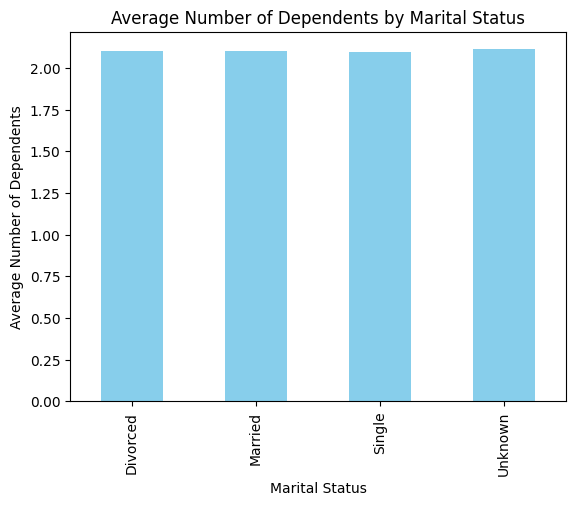

In [50]:
#Marital Status vs. Number of Dependents
df.groupby('Marital Status')['Number of Dependents'].mean().plot(kind='bar', color='skyblue')
plt.title("Average Number of Dependents by Marital Status")
plt.ylabel("Average Number of Dependents")
plt.show()

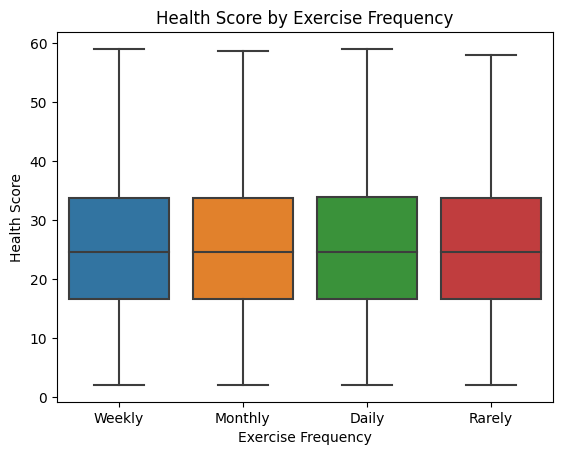

In [51]:
#Exercise Frequency vs. Health Score
sns.boxplot(x='Exercise Frequency', y='Health Score', data=df)
plt.title("Health Score by Exercise Frequency")
plt.show()

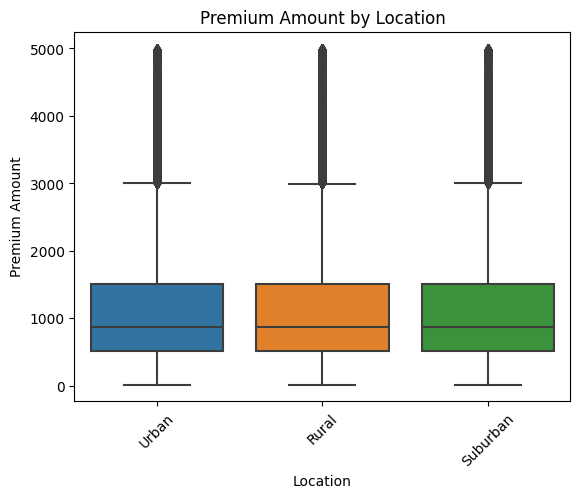

In [52]:
# Location vs. Premium Amount
sns.boxplot(x='Location', y='Premium Amount', data=df)
plt.title("Premium Amount by Location")
plt.xticks(rotation=45)
plt.show()

In [53]:
#df.info()
#test.info()
#test.head()
df['Age Group'].unique()

['0-25', '26-40', '41-60', '60+']
Categories (4, object): ['0-25' < '26-40' < '41-60' < '60+']

In [54]:
#df.info()
total_rows = test.shape[0]
print(f"Total rows: {total_rows}")


Total rows: 800000


In [55]:
df['Age Group'] = df['Age Group'].astype('object')
print(df.dtypes)

id                        int64
Age                       int64
Gender                   object
Annual Income           float64
Marital Status           object
Number of Dependents    float64
Education Level          object
Occupation               object
Health Score            float64
Location                 object
Policy Type              object
Previous Claims         float64
Vehicle Age             float64
Credit Score            float64
Insurance Duration      float64
Policy Start Date        object
Customer Feedback        object
Smoking Status           object
Exercise Frequency       object
Property Type            object
Premium Amount          float64
Age Group                object
dtype: object


In [56]:
test['Age Group'] = test['Age Group'].astype('object')
print(test.dtypes)

id                        int64
Age                       int64
Gender                   object
Annual Income           float64
Marital Status           object
Number of Dependents    float64
Education Level          object
Occupation               object
Health Score            float64
Location                 object
Policy Type              object
Previous Claims         float64
Vehicle Age             float64
Credit Score            float64
Insurance Duration      float64
Policy Start Date        object
Customer Feedback        object
Smoking Status           object
Exercise Frequency       object
Property Type            object
Age Group                object
dtype: object


In [57]:
categorical_columns = test.select_dtypes(include=['object']).columns.tolist()

for col in categorical_columns:
    test[col] = test[col].astype('category')



In [58]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_columns:
    df[col] = df[col].astype('category')


In [59]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in numerical_columns:
    df[col] = df[col].astype('int64')

In [60]:
numerical_columns = test.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in numerical_columns:
    test[col] = test[col].astype('int64')

In [61]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   id                    800000 non-null  int64   
 1   Age                   800000 non-null  int64   
 2   Gender                800000 non-null  category
 3   Annual Income         800000 non-null  int64   
 4   Marital Status        800000 non-null  category
 5   Number of Dependents  800000 non-null  int64   
 6   Education Level       800000 non-null  category
 7   Occupation            800000 non-null  category
 8   Health Score          800000 non-null  int64   
 9   Location              800000 non-null  category
 10  Policy Type           800000 non-null  category
 11  Previous Claims       800000 non-null  int64   
 12  Vehicle Age           800000 non-null  int64   
 13  Credit Score          800000 non-null  int64   
 14  Insurance Duration    800000 non-nul

In [62]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import mean_squared_error, r2_score
import optuna

# Function to calculate RMSLE
def rmsle(y_true, y_pred):
    log_true = np.log1p(y_true)
    log_pred = np.log1p(y_pred)
    return np.sqrt(np.mean((log_true - log_pred) ** 2))

# Load the data (replace with actual data loading)
X = df.drop(columns=['Premium Amount', 'id'])
y = df['Premium Amount']
test_features = test.drop(columns=['id'])

# Convert categorical columns to category dtype (XGBoost supports this natively)
cat_columns = X.select_dtypes(include='category').columns
X[cat_columns] = X[cat_columns].apply(lambda col: col.cat.codes)
test_features[cat_columns] = test_features[cat_columns].apply(lambda col: col.cat.codes)

# Create DMatrix for faster computation
dtest = xgb.DMatrix(test_features, enable_categorical=True)

# Define Optuna objective function with adjusted parameters
def objective(trial):
    params = {
        'objective': 'reg:squarederror',
        'n_estimators': trial.suggest_int('n_estimators', 200, 1500),  # Increased range for more flexibility
        'max_depth': trial.suggest_int('max_depth', 5, 15),  # Increased range for deeper trees
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.15),  # Smaller learning rates for better performance
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'alpha': trial.suggest_float('alpha', 0.1, 10),  # L1 regularization
        'lambda': trial.suggest_float('lambda', 0.1, 10),  # L2 regularization
        'tree_method': 'gpu_hist',  # Use GPU if available
        'enable_categorical': True,
        'n_jobs': -1  # Use all available cores
    }

    # Split data into training and validation
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
    dtrain_fold = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
    dvalid_fold = xgb.DMatrix(X_valid, label=y_valid, enable_categorical=True)

    # Train the XGBoost model
    model = xgb.train(params, dtrain_fold, num_boost_round=params['n_estimators'], 
                      early_stopping_rounds=50, evals=[(dvalid_fold, 'eval')], verbose_eval=False)

    # Predict and calculate RMSLE
    y_pred = model.predict(dvalid_fold)
    return rmsle(y_valid, y_pred)

# Run Optuna study with pruning for faster convergence (parallelized search)
study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=10, n_jobs=4)  # Parallelizing Optuna trials

# Get best parameters
best_params = study.best_params
print("Best parameters:", best_params)

# Add GPU support to best parameters
best_params['tree_method'] = 'gpu_hist'

# Cross-validation with best parameters
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
final_predictions = np.zeros(len(test_features))
rmsle_scores = []
r2_scores = []

# Storing base model predictions to use for ensembling
base_model_predictions = []

# Using pre-split data for training
for fold, (train_idx, valid_idx) in enumerate(kf.split(X, y)):  # StratifiedKFold ensures better split
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

    dtrain_fold = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
    dvalid_fold = xgb.DMatrix(X_valid, label=y_valid, enable_categorical=True)

    # Train the XGBoost model
    model = xgb.train(best_params, dtrain_fold, num_boost_round=best_params['n_estimators'], 
                      early_stopping_rounds=50, evals=[(dvalid_fold, 'eval')], verbose_eval=False)

    # Predict on validation and test sets
    y_pred = model.predict(dvalid_fold)
    fold_test_pred = model.predict(dtest)
    final_predictions += fold_test_pred / kf.n_splits

    # Store base model predictions for ensembling (bagging/stacking)
    base_model_predictions.append(fold_test_pred)

    # Calculate metrics
    rmsle_scores.append(rmsle(y_valid, y_pred))
    r2_scores.append(r2_score(y_valid, y_pred))

    print(f"Fold {fold + 1}: RMSLE = {rmsle_scores[-1]:.4f}, R2 = {r2_scores[-1]:.4f}")

# Print average metrics
print(f"Average RMSLE: {np.mean(rmsle_scores):.4f}")
print(f"Average R-squared: {np.mean(r2_scores):.4f}")

# Stacking: Train a meta-model on the base model predictions (optional)
# For simplicity, we can use a simple average, but a linear regression meta-model can also be used
stacked_predictions = np.mean(base_model_predictions, axis=0)

[I 2025-08-09 10:10:04,709] A new study created in memory with name: no-name-1365c950-55b2-4643-86ba-ba934c621541
[10:10:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

[10:10:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

[10:10:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"
[10:10:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "his

Best parameters: {'n_estimators': 884, 'max_depth': 9, 'learning_rate': 0.06880138282894706, 'subsample': 0.8864776006977759, 'colsample_bytree': 0.9669466950296325, 'alpha': 6.102665483693667, 'lambda': 5.685853121448289}


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:11:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:11:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:11:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree

Fold 1: RMSLE = 1.1354, R2 = 0.0606


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:11:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:11:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:11:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Fold 2: RMSLE = 1.1351, R2 = 0.0599


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:11:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:11:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:11:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Fold 3: RMSLE = 1.1336, R2 = 0.0628


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:11:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:11:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:11:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Fold 4: RMSLE = 1.1337, R2 = 0.0627


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:11:16] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:11:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 5: RMSLE = 1.1349, R2 = 0.0605
Average RMSLE: 1.1345
Average R-squared: 0.0613


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [10:11:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
